In [1]:
#import dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:
#Use to allow colab access to GoogleDrive

from google.colab import drive
drive.mount('/content/drive')

import glob

# Search for the file across all of MyDrive
file_path = glob.glob('/content/drive/MyDrive/**/*World_Happiness_ML.csv', recursive=True)
print(file_path)

Mounted at /content/drive
['/content/drive/MyDrive/Colab Notebooks/Project4/World_Happiness_ML.csv']


In [3]:
import pandas as pd
import os

#Replace Folder Name with actual folder name
file_path = '/content/drive/MyDrive/Colab Notebooks/Project4/World_Happiness_ML.csv'



#Read the excel file
happiness_df = pd.read_csv(file_path)

happiness_df

,Country name,alpha-3,region,sub-region,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,Afghanistan,AFG,Asia,Southern Asia,2008,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,Afghanistan,AFG,Asia,Southern Asia,2009,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,Afghanistan,AFG,Asia,Southern Asia,2010,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,Afghanistan,AFG,Asia,Southern Asia,2011,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,Afghanistan,AFG,Asia,Southern Asia,2012,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2019,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,2.693523
2359,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2020,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.159802
2360,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2021,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.154578
2361,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2022,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.296220


In [4]:
#Use ETL to begin cleaning the data

#Get list of column names
happiness_df.columns.tolist()

['Country name',
 'alpha-3',
 'region',
 'sub-region',
 'year',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Life Ladder']

In [5]:
#Rename one of the columns
no_null_happiness_df = happiness_df
no_null_happiness_df = no_null_happiness_df.rename(columns= {"year": "Year"})
no_null_happiness_df.columns.tolist()

['Country name',
 'alpha-3',
 'region',
 'sub-region',
 'Year',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Life Ladder']

In [6]:
#Calculate the correlation between Life Ladder and other features

#Import dependencies for possible slope equation, we want to run an anova test
#to see if the features are statistically significant to the happiness/Life Ladder

from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
from sklearn import datasets

clean_happiness_df = no_null_happiness_df

In [7]:
#Begin with Random Forest Model
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [8]:
# Drop the non-beneficial ID columns, 'Country Name'
complete_happiness_df = no_null_happiness_df.drop(columns = ["Country name", "alpha-3", "sub-region", "Year"])
complete_happiness_df

,region,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,Asia,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,Asia,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,Asia,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,Asia,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,Asia,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938
...,...,...,...,...,...,...,...,...,...,...
2358,Africa,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,2.693523
2359,Africa,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.159802
2360,Africa,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.154578
2361,Africa,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.296220


In [9]:
# Use dummie function to get variables for region
region_dummies = pd.get_dummies(complete_happiness_df["region"]).astype(int)
region_dummies.head()

,Africa,Americas,Asia,Europe,Oceania
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [10]:
# Join the the region_dummies and the world_happiness_data_region_df
complete_happiness_df = pd.concat([complete_happiness_df, region_dummies], axis=1)

# Drop the region column and the target column to get the the features set
X = complete_happiness_df.drop(columns=["region", "Life Ladder"])
X.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Africa,Americas,Asia,Europe,Oceania
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,0,0,1,0,0
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,0,0,1,0,0
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,0,0,1,0,0
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,0,0,1,0,0
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,0,0,1,0,0


In [11]:
#remove null data, drop all rows with missing data

complete_happiness_df = complete_happiness_df.dropna(how='any')
complete_happiness_df.head()

,region,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder,Africa,Americas,Asia,Europe,Oceania
0,Asia,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590,0,0,1,0,0
1,Asia,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778,0,0,1,0,0
2,Asia,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381,0,0,1,0,0
3,Asia,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719,0,0,1,0,0
4,Asia,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938,0,0,1,0,0


In [12]:
#Look for missing values
complete_happiness_df.count()

,0
region,2094
Log GDP per capita,2094
Social support,2094
Healthy life expectancy at birth,2094
Freedom to make life choices,2094
Generosity,2094
Perceptions of corruption,2094
Positive affect,2094
Negative affect,2094
Life Ladder,2094


In [13]:
# Define features set, Want to predict the overall happiness, (X) Target: Life ladder (happiness), Features are all other columns

X = complete_happiness_df.copy()
X.drop(columns=["region", "Life Ladder"], axis=1, inplace=True)
X.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Africa,Americas,Asia,Europe,Oceania
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,0,0,1,0,0
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,0,0,1,0,0
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,0,0,1,0,0
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,0,0,1,0,0
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,0,0,1,0,0


In [14]:
# Define target vector
y = complete_happiness_df["Life Ladder"].ravel()
y[:5]

<ipython-input-14-d528e1f01d51>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = complete_happiness_df["Life Ladder"].ravel()


array([3.7235899 , 4.40177822, 4.75838089, 3.83171916, 3.78293753])

## **GBR with Regions**

In [15]:
#Build Gradient Boosting Regressor

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [16]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=780)

In [17]:
reg = GradientBoostingRegressor(random_state=50, n_estimators=300, learning_rate=0.01, max_depth=3, min_samples_split=2, loss='squared_error', min_samples_leaf=1)

In [18]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=50)

In [19]:
training_p = reg.predict(X_train)
test_p = reg.predict(X_test)


In [20]:
reg.score(X_test, y_test)

0.8251118884409225

Using a standard scaler when building a gradient boosting regressor is generally not necessary. Gradient boosting algorithms, such as XGBoost or LightGBM, are tree-based methods that are not sensitive to the scale of the input features. These algorithms can handle features of different scales without requiring normalization or standardization.

In [21]:
# Making predictions using the testing data
test_predictions = reg.predict(X_test)


In [22]:
# Calculations

#Calculating the accuracy score
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, test_predictions)
print(f"Mean absolute Error (MAE): {mae}")

#Calculate the mse and rmse
from sklearn.metrics import mean_squared_error

y_actual = y_test
# Calculate MSE
mse = mean_squared_error(y_actual, test_predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean absolute Error (MAE): 0.37034217498545907
Mean Squared Error (MSE): 0.23221745627984444
Root Mean Squared Error (RMSE): 0.4818894647944116


In [23]:
#Overfit check
#Calculate R-squared for test and training data, training > testing

#Calculate R-squared
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, test_predictions)
print(f"R2 Test Region: {test_r2}")


train_predictions = reg.predict(X_train)
training_r2 = r2_score(y_train, train_predictions)
print(f"R2 Training Subregion: {training_r2}")


R2 Test Region: 0.8251118884409225
R2 Training Subregion: 0.8598762943281049


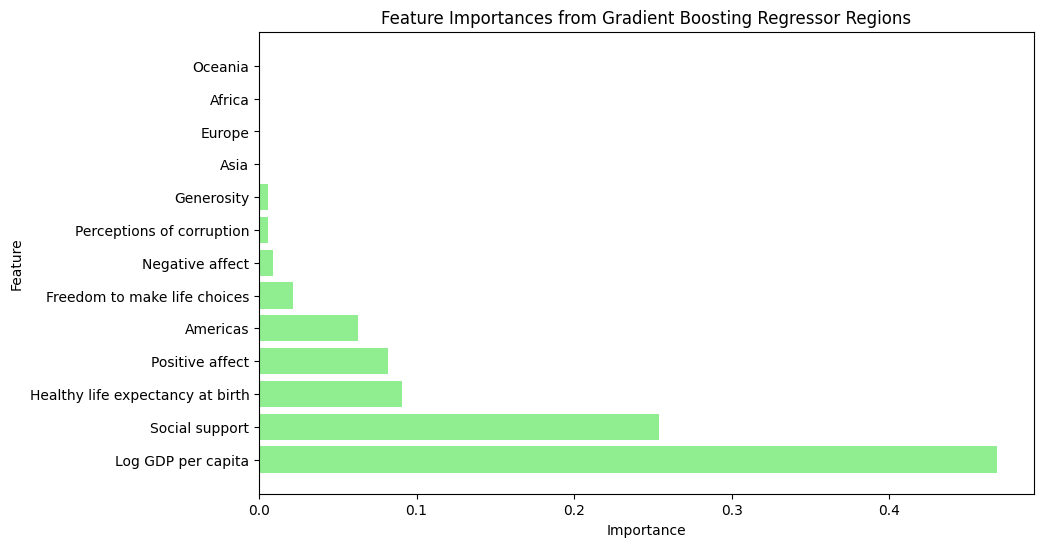

In [24]:
# Calculate feature importances
importances = reg.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='lightgreen')
plt.title('Feature Importances from Gradient Boosting Regressor Regions')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## **With SubRegions**


In [25]:

# Drop the non-beneficial ID columns and define features
subregion_df = no_null_happiness_df.drop(columns = ["Country name", "alpha-3", "region", "Year"])
subregion_df


,sub-region,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,Southern Asia,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,Southern Asia,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,Southern Asia,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,Southern Asia,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,Southern Asia,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938
...,...,...,...,...,...,...,...,...,...,...
2358,Sub-Saharan Africa,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,2.693523
2359,Sub-Saharan Africa,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.159802
2360,Sub-Saharan Africa,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.154578
2361,Sub-Saharan Africa,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.296220


In [26]:
# Use dummie function to get variables for region
subregion_dummies = pd.get_dummies(subregion_df["sub-region"]).astype(int)
subregion_dummies.head()

,Australia and New Zealand,Central Asia,Eastern Asia,Eastern Europe,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
# Join the the region_dummies and the world_happiness_data_region_df
complete_subregion_df = pd.concat([subregion_df, subregion_dummies], axis=1)

# Drop the region column and the target column to get the the features set
X2 =  complete_subregion_df.drop(columns=["sub-region", "Life Ladder"])
X2.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Australia and New Zealand,Central Asia,...,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
#remove null data, drop all rows with missing data

complete_subregion_df = complete_subregion_df.dropna(how='any')
complete_subregion_df.head()

,sub-region,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder,...,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,Southern Asia,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590,...,0,0,0,0,0,1,0,0,0,0
1,Southern Asia,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778,...,0,0,0,0,0,1,0,0,0,0
2,Southern Asia,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381,...,0,0,0,0,0,1,0,0,0,0
3,Southern Asia,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719,...,0,0,0,0,0,1,0,0,0,0
4,Southern Asia,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938,...,0,0,0,0,0,1,0,0,0,0


In [29]:
# Define features set, Want to predict the overall happiness, (X) Target: Life ladder (happiness), Features are all other columns

X2 = complete_subregion_df.copy()
X2.drop(columns=["sub-region", "Life Ladder"], axis=1, inplace=True)
X2.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Australia and New Zealand,Central Asia,...,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# Define target vector
y2 = complete_subregion_df["Life Ladder"].ravel()
y2[:5]


<ipython-input-30-b67ed48ace20>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y2 = complete_subregion_df["Life Ladder"].ravel()


array([3.7235899 , 4.40177822, 4.75838089, 3.83171916, 3.78293753])

In [31]:
# Splitting into Train and Test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=780)

In [32]:
reg2 = GradientBoostingRegressor(random_state=50, n_estimators=300, learning_rate=0.01, max_depth=3, min_samples_split=2, loss='squared_error', min_samples_leaf=1)

In [33]:
reg2.fit(X2_train, y2_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=50)

In [34]:
training2_p = reg2.predict(X2_train)
test2_p = reg2.predict(X2_test)

In [35]:
reg2.score(X2_test, y2_test)

0.826910854313763

In [36]:
# Making predictions using the testing data
test2_predictions = reg2.predict(X2_test)


In [37]:
#Calculations

#Calculating the accuracy score
from sklearn.metrics import mean_absolute_error

mae2 = mean_absolute_error(y2_test, test2_predictions)
mae2
print(f"Mean absolute Error (MAE): {mae2}")

#Calculate the mse and rmse
from sklearn.metrics import mean_squared_error

y2_actual = y2_test
# Calculate MSE
mse2 = mean_squared_error(y2_actual, test2_predictions)
print(f"Mean Squared Error (MSE): {mse2}")

# Calculate RMSE
rmse2 = np.sqrt(mse2)
print(f"Root Mean Squared Error (RMSE): {rmse2}")



Mean absolute Error (MAE): 0.36818953956310635
Mean Squared Error (MSE): 0.22982877888375888
Root Mean Squared Error (RMSE): 0.4794046087427184


In [38]:
#Overfit check

#Calculate R-squared for test and training data
from sklearn.metrics import r2_score
test2_r2 = r2_score(y2_test, test2_predictions)
print(f"R2 Test Subregion: {test2_r2}")


train2_predictions = reg2.predict(X2_train)
training2_r2 = r2_score(y2_train, train2_predictions)
print(f"R2 Training Subregion: {training2_r2}")


R2 Test Subregion: 0.826910854313763
R2 Training Subregion: 0.8615000459026786


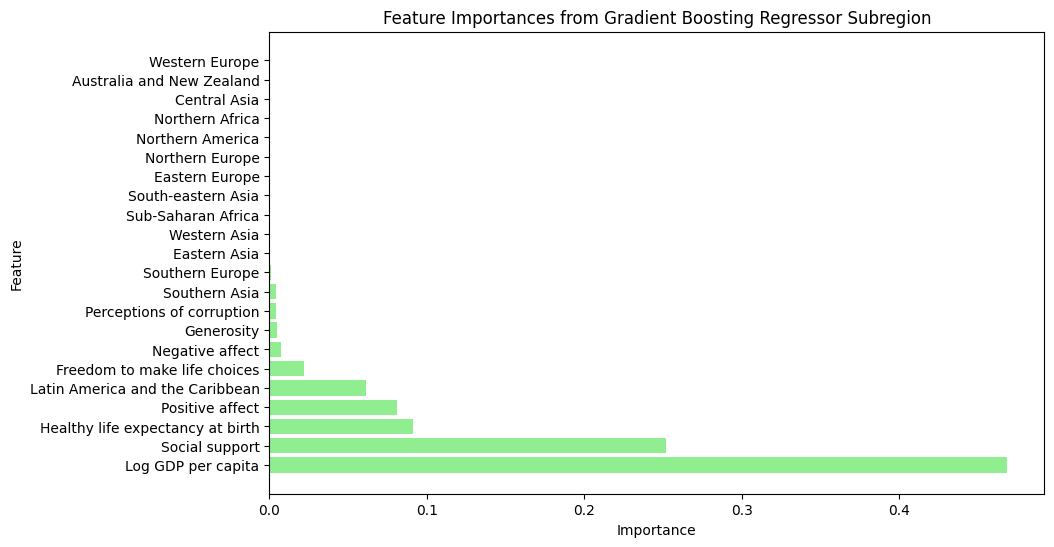

In [39]:
# Calculate feature importances
importances2 = reg2.feature_importances_

# Create a DataFrame for visualization
importances2_df = pd.DataFrame({'Feature': X2.columns, 'Importance': importances2})
importances2_df = importances2_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances2_df['Feature'], importances2_df['Importance'], color='lightgreen')
plt.title('Feature Importances from Gradient Boosting Regressor Subregion')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()